In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [2]:
import cv2
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Define categories and directories
Categories = ['angry', 'embarrassed', 'happy', 'sad', 'shock']
data_dirs = {
    'train': 'veri_seti/train/',
    'test': 'veri_seti/test/'
}

def load_data_from_directory(directory, categories, img_size=(150, 150)):
    data_arr = []  # Input array
    target_arr = []  # Output array

    for category in categories:
        print(f'loading... category : {category}')
        path = os.path.join(directory, category)
        for img_name in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img_name))
            if img_array is not None:
                img_array_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_resized = cv2.resize(img_array_gray, img_size)
                data_arr.append(img_resized.flatten())  # Flatten the image
                target_arr.append(categories.index(category))
        print(f'loaded category: {category} successfully')

    data = np.array(data_arr)
    target = np.array(target_arr)
    return data, target

# Load training data
x_train, y_train = load_data_from_directory(data_dirs['train'], Categories)
# Load testing data
x_test, y_test = load_data_from_directory(data_dirs['test'], Categories)

# One-hot encode target variables
onehot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test.reshape(-1, 1))

print('Training data and labels loaded.')
print('Testing data and labels loaded.')

# Verify the shapes of the data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train_encoded.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test_encoded.shape}')


loading... category : angry
loaded category: angry successfully
loading... category : embarrassed
loaded category: embarrassed successfully
loading... category : happy
loaded category: happy successfully
loading... category : sad
loaded category: sad successfully
loading... category : shock
loaded category: shock successfully
loading... category : angry
loaded category: angry successfully
loading... category : embarrassed
loaded category: embarrassed successfully
loading... category : happy
loaded category: happy successfully
loading... category : sad
loaded category: sad successfully
loading... category : shock
loaded category: shock successfully
Training data and labels loaded.
Testing data and labels loaded.
x_train shape: (402, 22500)
y_train shape: (402, 5)
x_test shape: (100, 22500)
y_test shape: (100, 5)


c:\Users\Yavuz\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.1, 1],
    'kernel': ['rbf', 'poly']
}

# Creating a support vector classifier
svc = svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid)

# Assume we have X_train and y_train as training data
model.fit(x_train, y_train)

# Printing the best parameters
print("Best parameters found: ", model.best_params_)


Best parameters found:  {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}


In [4]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")


The model is 49.0% accurate


In [5]:
print(classification_report(y_test, y_pred, target_names=['angry','embarrassed','happy','sad','shock']))


              precision    recall  f1-score   support

       angry       0.52      0.65      0.58        20
 embarrassed       0.25      0.15      0.19        20
       happy       0.65      0.65      0.65        20
         sad       0.35      0.35      0.35        20
       shock       0.57      0.65      0.60        20

    accuracy                           0.49       100
   macro avg       0.47      0.49      0.47       100
weighted avg       0.47      0.49      0.47       100



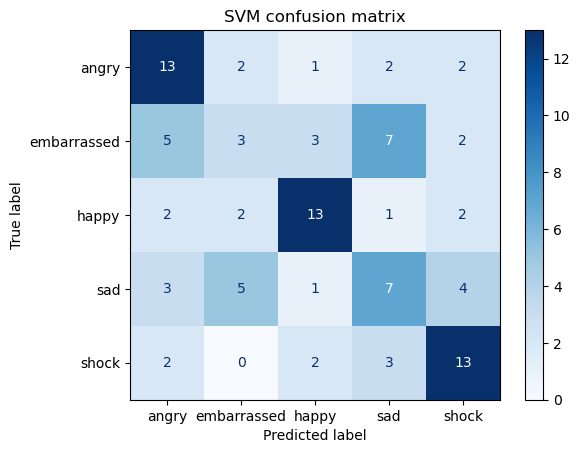

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
label = ['angry','embarrassed','happy','sad','shock']
# Displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.title('SVM confusion matrix')
plt.show()

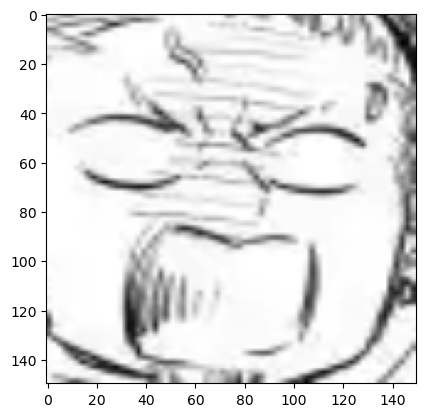

angry = 18.26755956710419%
embarrassed = 11.700391786051695%
happy = 27.379090998415634%
sad = 21.482600387678602%
shock = 21.170357260749892%
The predicted image is: happy


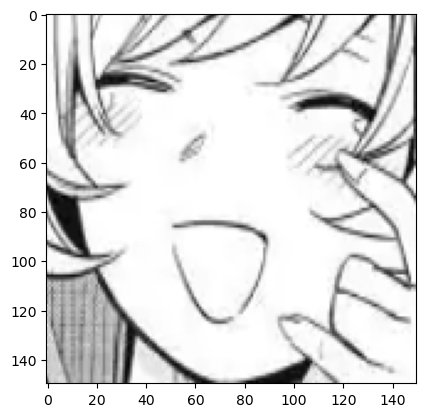

angry = 15.598879833352925%
embarrassed = 24.317610789037655%
happy = 31.739948622875374%
sad = 17.842701169925665%
shock = 10.50085958480842%
The predicted image is: happy


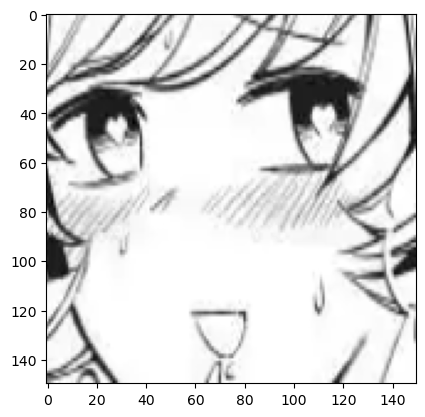

angry = 4.891767716191175%
embarrassed = 46.461536784873694%
happy = 8.975059592801069%
sad = 29.189555642431426%
shock = 10.48208026370264%
The predicted image is: embarrassed


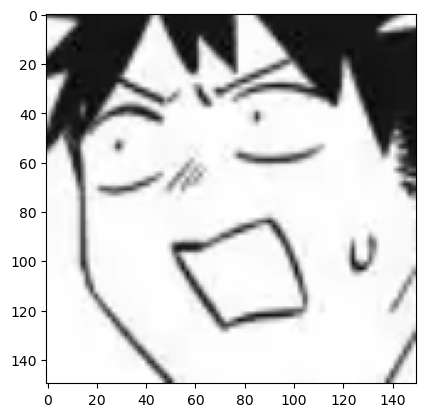

angry = 3.475529790235784%
embarrassed = 7.164023397511987%
happy = 39.96173037213759%
sad = 3.5240227199094254%
shock = 45.874693720205215%
The predicted image is: shock


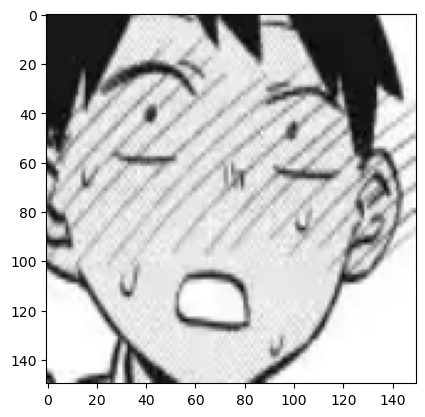

angry = 11.299447201126304%
embarrassed = 19.795667650082407%
happy = 11.477347231364146%
sad = 22.47547694621553%
shock = 34.952060971211566%
The predicted image is: shock


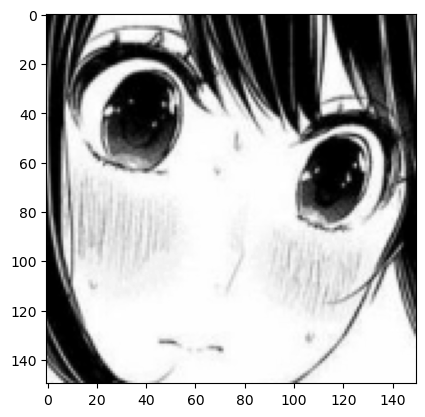

angry = 3.162998416526317%
embarrassed = 35.609933499472284%
happy = 6.777855819331837%
sad = 47.04413736511091%
shock = 7.405074899558615%
The predicted image is: sad


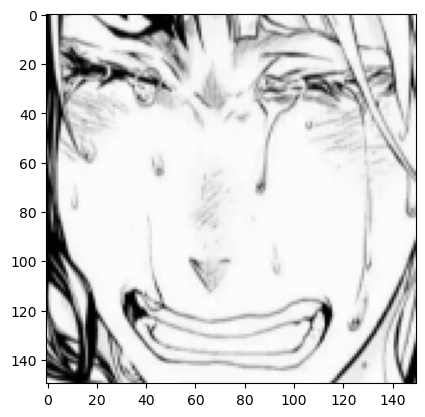

angry = 15.39135112745578%
embarrassed = 12.340866948863006%
happy = 12.28460872030014%
sad = 34.065731655810964%
shock = 25.917441547570135%
The predicted image is: sad


In [7]:
import cv2
import os
import matplotlib.pyplot as plt

# Assuming 'model' and 'Categories' are defined elsewhere

# Path to the folder containing images to be predicted
path = 'veri_seti/guess'

# Iterate over each image file in the folder
for img_name in os.listdir(path):
    # Load the image
    img_array = cv2.imread(os.path.join(path, img_name))

    # Convert the image to grayscale
    img_array_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

    # Resize the image
    img_resized = cv2.resize(img_array_gray, (150, 150))

    plt.imshow(img_resized, cmap='gray')  # Display the grayscale image
    plt.show()

    # Assuming 'model' is your trained model
    # Assuming 'Categories' is a list of category names
    # Assuming 'model.predict_proba()' returns probabilities for each category

    l = [img_resized.flatten()]
    probability = model.predict_proba(l)

    for ind, val in enumerate(Categories):
        print(f'{val} = {probability[0][ind]*100}%')

    # Assuming 'model.predict()' returns the predicted class index
    predicted_class_index = model.predict(l)[0]
    predicted_category = Categories[predicted_class_index]
    print("The predicted image is:", predicted_category)
